In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('../Task5_Logistic-Regression/Social_Network_Ads.csv')
dataset.head()
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,-1].values

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", f"{accuracy*100:.2f}%")

[[62  6]
 [ 3 29]]
Accuracy:  91.00%


### Tree Structure

[Text(0.4967948717948718, 0.9615384615384616, 'x[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(0.26282051282051283, 0.8846153846153846, 'x[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(0.3798076923076923, 0.9230769230769231, 'True  '),
 Text(0.11538461538461539, 0.8076923076923077, 'x[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08974358974358974, 0.7307692307692307, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14102564102564102, 0.7307692307692307, 'x[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11538461538461539, 0.6538461538461539, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.16666666666666666, 0.6538461538461539, 'x[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(0.14102564102564102, 0.5769230769230769, 'x[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11538461538461539, 0.5, 'entropy = 0.0\nsamples = 1\nv

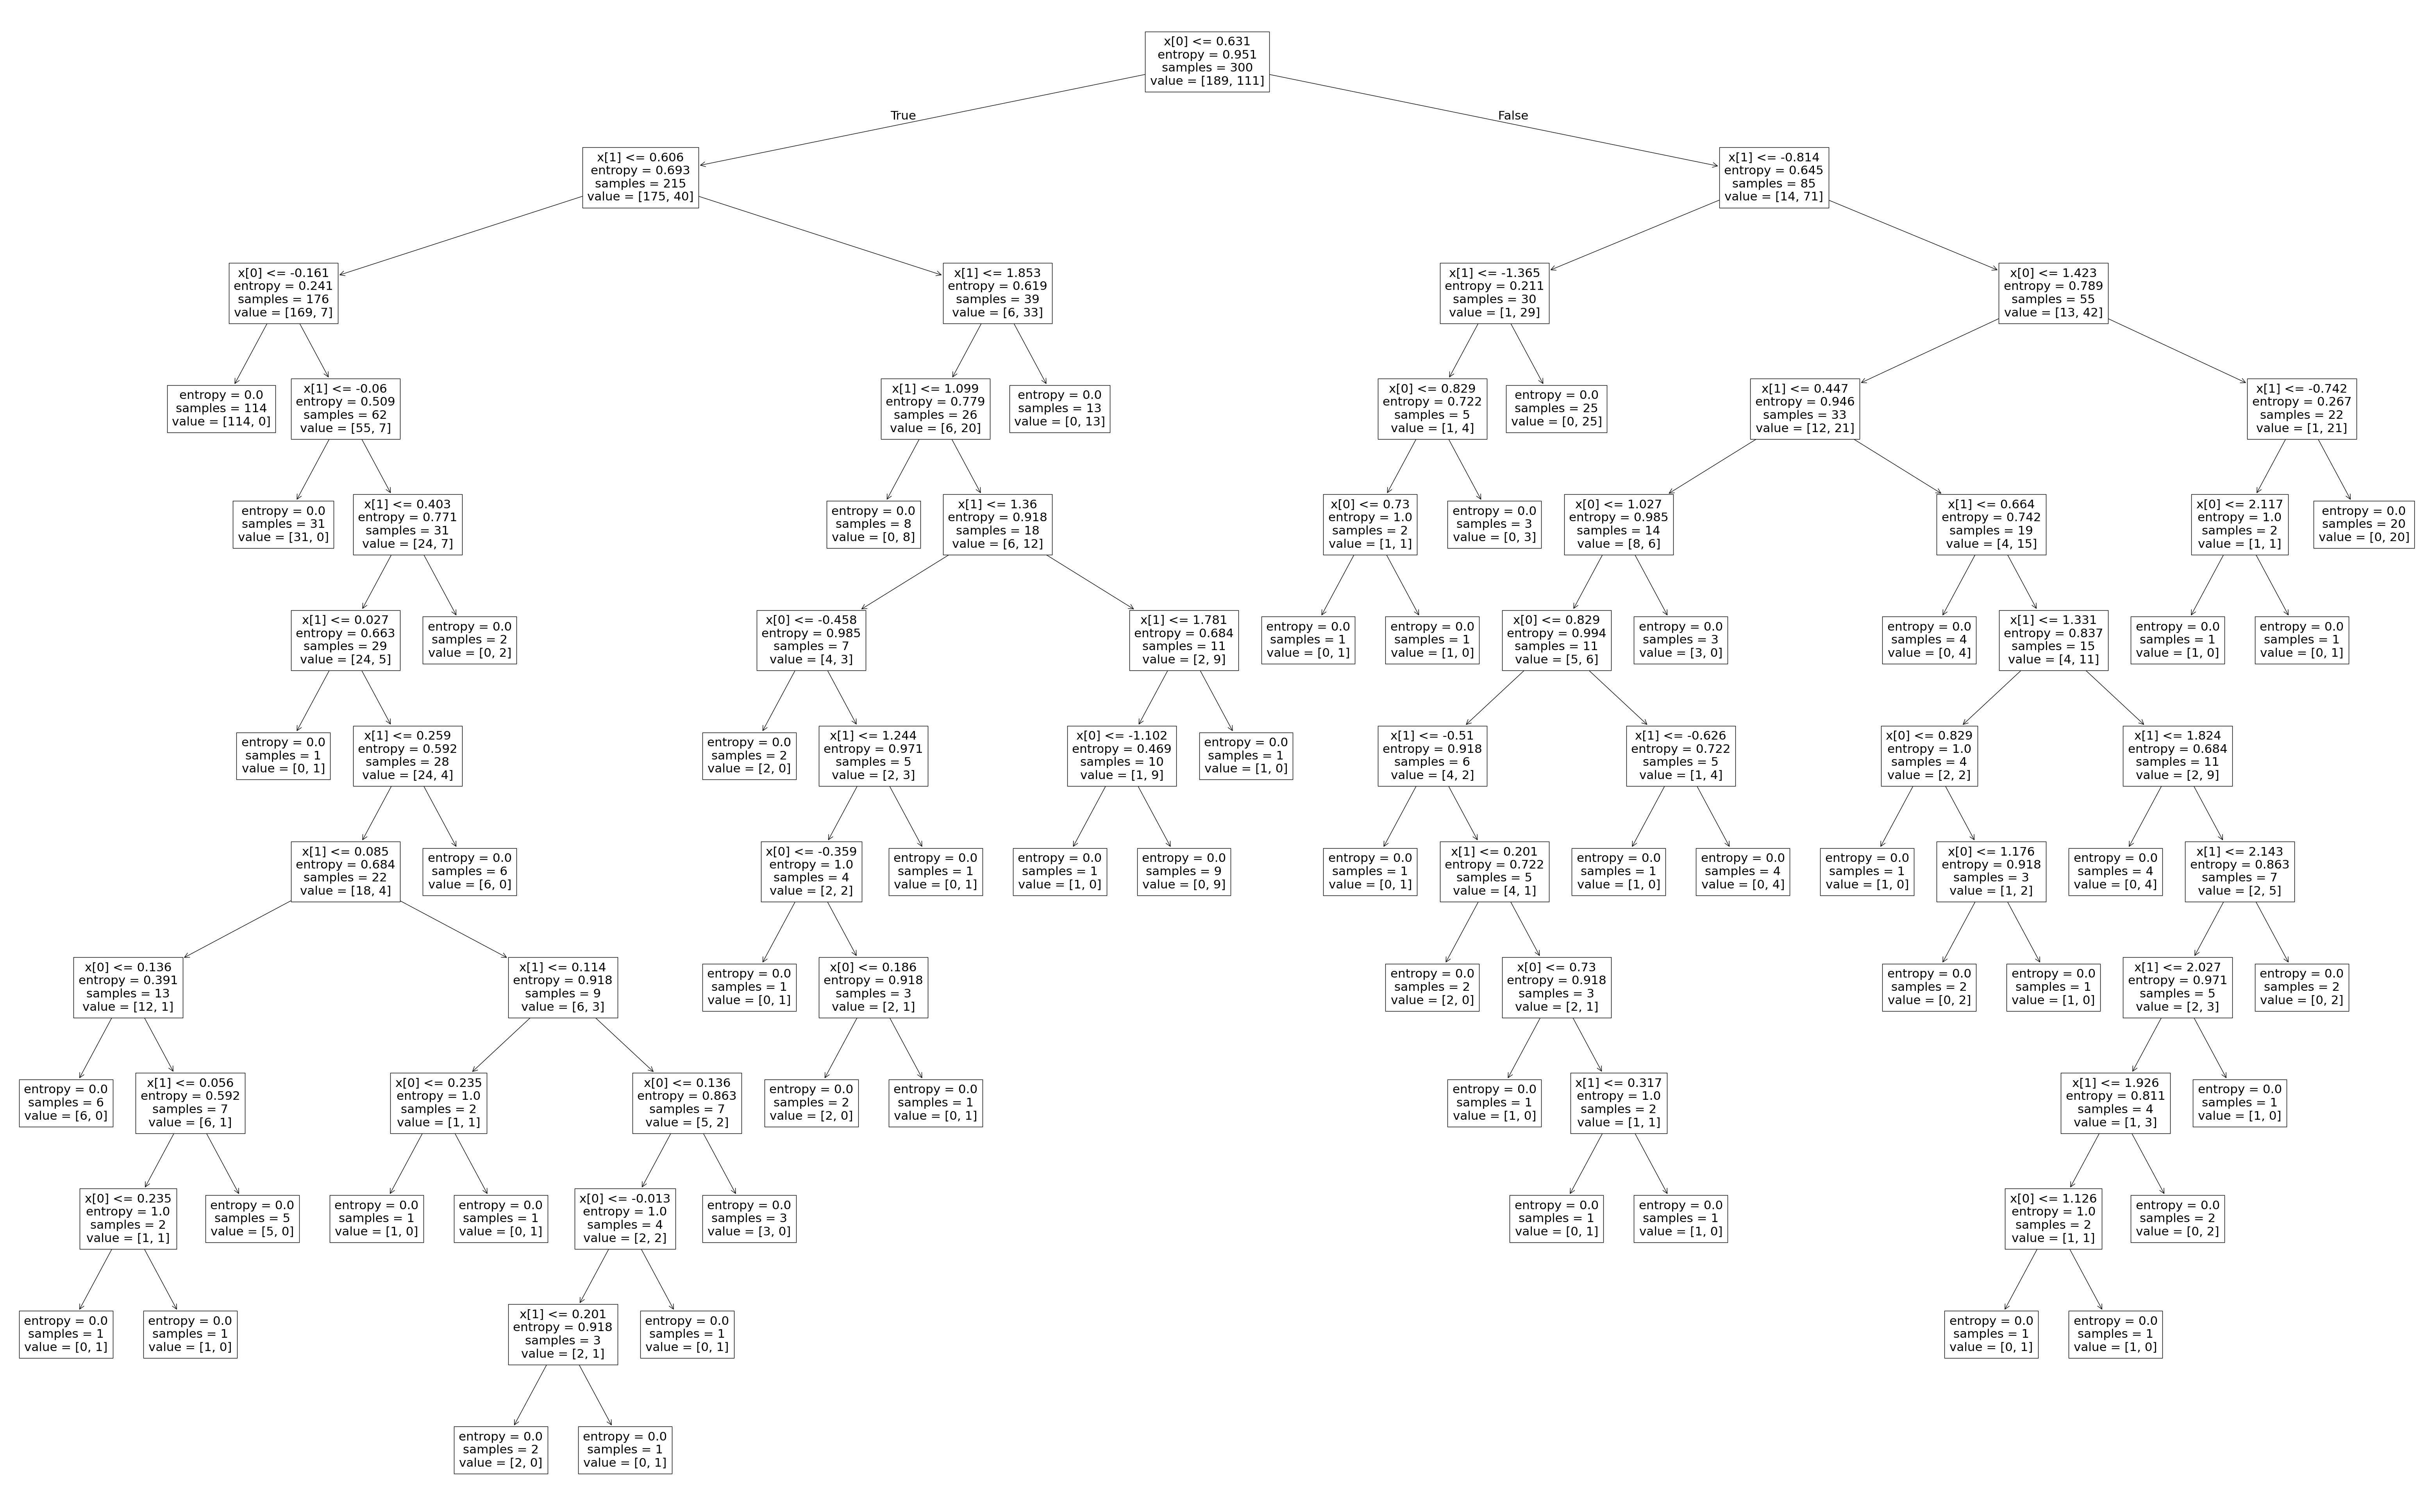

In [26]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(classifier)

### Helper Function

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_DT_boundary(X_scaled, y, title, sc, classifier):
    # Convert back to original scale for plotting
    X_set = sc.inverse_transform(X_scaled)
    y_set = y

    # Safe meshgrid
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 1.0),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 1.0)
    )

    # Predict over grid
    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = classifier.predict(sc.transform(grid))
    Z = Z.reshape(X1.shape)

    # Plot decision boundary
    plt.contourf(
        X1, X2, Z,
        alpha=0.75,
        cmap=ListedColormap(('red', 'green'))
    )

    # Plot points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green'))(i),
            label=j
        )

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3540902430.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


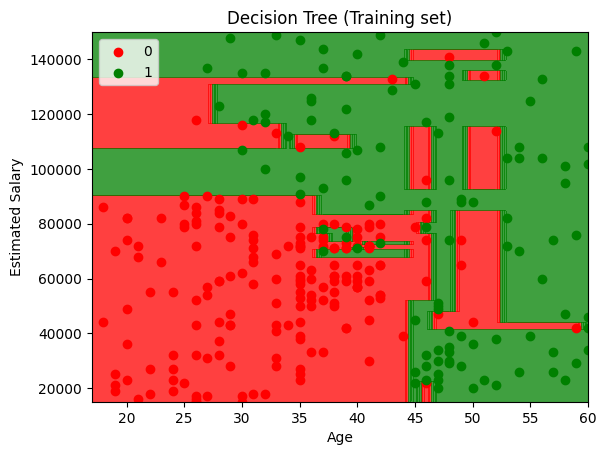

In [24]:
# Training set visualization
plot_DT_boundary(
    X_train,
    y_train,
    'Decision Tree (Training set)',
    sc,
    classifier
)


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3540902430.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


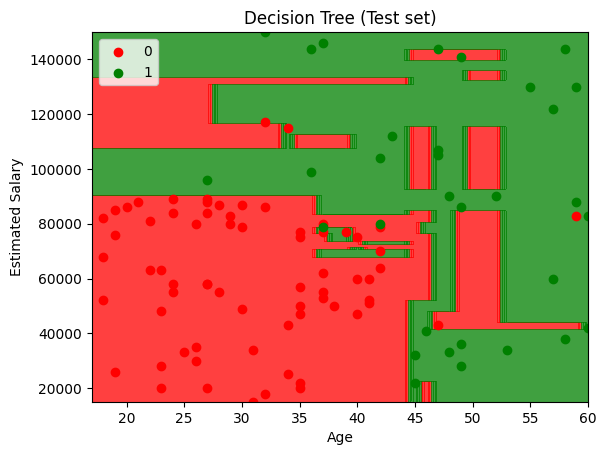

In [25]:
# Test set visualization
plot_DT_boundary(
    X_test,
    y_test,
    'Decision Tree (Test set)',
    sc,
    classifier
)